# Thresholding using OSTU's method

## Importing necessary libraries 

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Loading Image 

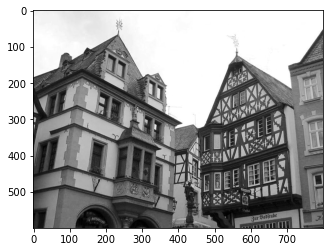

In [9]:
img = cv2.imread("sample.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, 'gray')

## Histogram of the image 

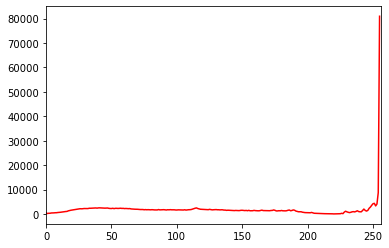

In [10]:
histr = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histr,color = 'r')
plt.xlim([0,256])
plt.show()

In [11]:
img.shape

(600, 800)

In [12]:
from collections import Counter

In [13]:
def count_val(img):
    c = Counter()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
                c[img[i,j]] += 1
    return c    

In [14]:
histogramCounts = count_val(img)

In [16]:
total = img.shape[0]*img.shape[1]
total

480000

## OSTU's Algroithm implementation 

In [17]:
top = 256
sumB = 0
wB = 0
maximum = 0.0
sum1 = 0
lis = []
for j in range(1, 256):
        sum1 += histogramCounts[j]*j
        
for i in range(0, 256):
    wF = total - wB
    
    if wF > 0 and wB > 0:
        mF = (sum1 - sumB) / wF
        val = wB*wF*((sumB/wB) - mF)*((sumB/wB) - mF)
        lis.append(val)
        if val >= maximum:
            level = i
            maximum = val
        
        mF = (sum1 - sumB) / wF;
        val = wB * wF * ((sumB / wB) - mF) * ((sumB / wB) - mF);
        if val >= maximum:
            level = i
            maximum = val
            
    wB = wB + histogramCounts[i]
    sumB = sumB + (i-1)*histogramCounts[i]
            
print(str(level) + " level intensity has maximum variance = " + str(maximum))


155 level intensity has maximum variance = 1288763607255869.8


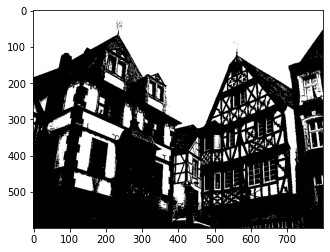

In [18]:
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i,j] >= level:
            img[i, j] = 255
        else:
            img[i,j] = 0
plt.imshow(img, 'gray')            